## Importing Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import lightning.pytorch as pl
import itertools

print(torch.__version__)

2.0.1


## Hyperparameters

In [2]:
learning_rate = 0.0001
batch_size = 64
epochs = 100
img_size = (33,33)

## Downloading and Loading Data

In [8]:
class Cifar10Dataset(Dataset):
    def __init__(self, images, permutations, transforms = None):
        self.images = images
        self.transforms = transforms
        self.permutations = permutations

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        if self.transforms:
            img = self.transforms(img)
        orig_img = img
        # Generating patches
        patches = []
        for i in range(9):
            row, col = i//3, i%3
            row_start, row_end = row*11, row*11+11
            col_start, col_end = col*11, col*11+11
            patches.append(orig_img[:, row_start:row_end, col_start:col_end])
        perm_idx = np.random.randint(len(self.permutations))
        perm = self.permutations[perm_idx]
        patches = [patches[idx] for idx in perm]
        permuted_img = np.zeros_like(orig_img)
        for i in range(9):
            row, col = i//3, i%3
            row_start, row_end = row*11, row*11+11
            col_start, col_end = col*11, col*11+11
            permuted_img[:, row_start:row_end, col_start:col_end] = patches[i]
        return orig_img, permuted_img, patches, perm_idx

In [13]:
cifar10_train = datasets.CIFAR10('./data/', train=True, transform=None)
all_permutations = list(itertools.permutations([0,1,2,3,4,5,6,7,8]))
cifar10_test = datasets.CIFAR10('./data', train=False)

In [14]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size),
    transforms.ToTensor()
])

train_dataset = Cifar10Dataset(cifar10_train.data, all_permutations, train_transforms)
test_dataset = Cifar10Dataset(cifar10_test.data, all_permutations, test_transforms)
trainloader = DataLoader(train_dataset, batch_size=batch_size, pin_memory=True, num_workers=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, pin_memory=True, num_workers=8, shuffle=False)

## Visualizing Data

In [15]:
def images_visualization(orig_images, permuted_image):
    fig, axes = plt.subplots(nrows=8, ncols=17, figsize=(17,8))
    orig_images = orig_images[:64]
    permuted_image = permuted_image[:64]
    for idx, (kernel1, kernel2) in enumerate(zip(orig_images, permuted_image)):
        row_num = idx // 8
        col_num1 = idx % 8
        col_num2 = idx % 8 + 9

        # Display the first set of kernels
        if kernel1.ndim == 3:
            axes[row_num][col_num1].imshow(kernel1.permute(1,2,0))
        else:
            axes[row_num][col_num1].imshow(kernel1, cmap = 'gray')
        axes[row_num][col_num1].axis('off')
        
        # Display the second set of kernels
        if kernel2.ndim == 3:
            axes[row_num][col_num2].imshow(kernel2.permute(1,2,0))
        else:
            axes[row_num][col_num2].imshow(kernel2, cmap = 'gray')
        axes[row_num][col_num2].axis('off')

    for row_num in range(8):
        axes[row_num][8].axis('off')
        
    # Add titles for the first and second set of kernels
    axes[0][3].set_title(f"Original Images",fontsize=20)
    axes[0][12].set_title(f"Images with permuted patch",fontsize=20)

    plt.tight_layout()
    plt.show()

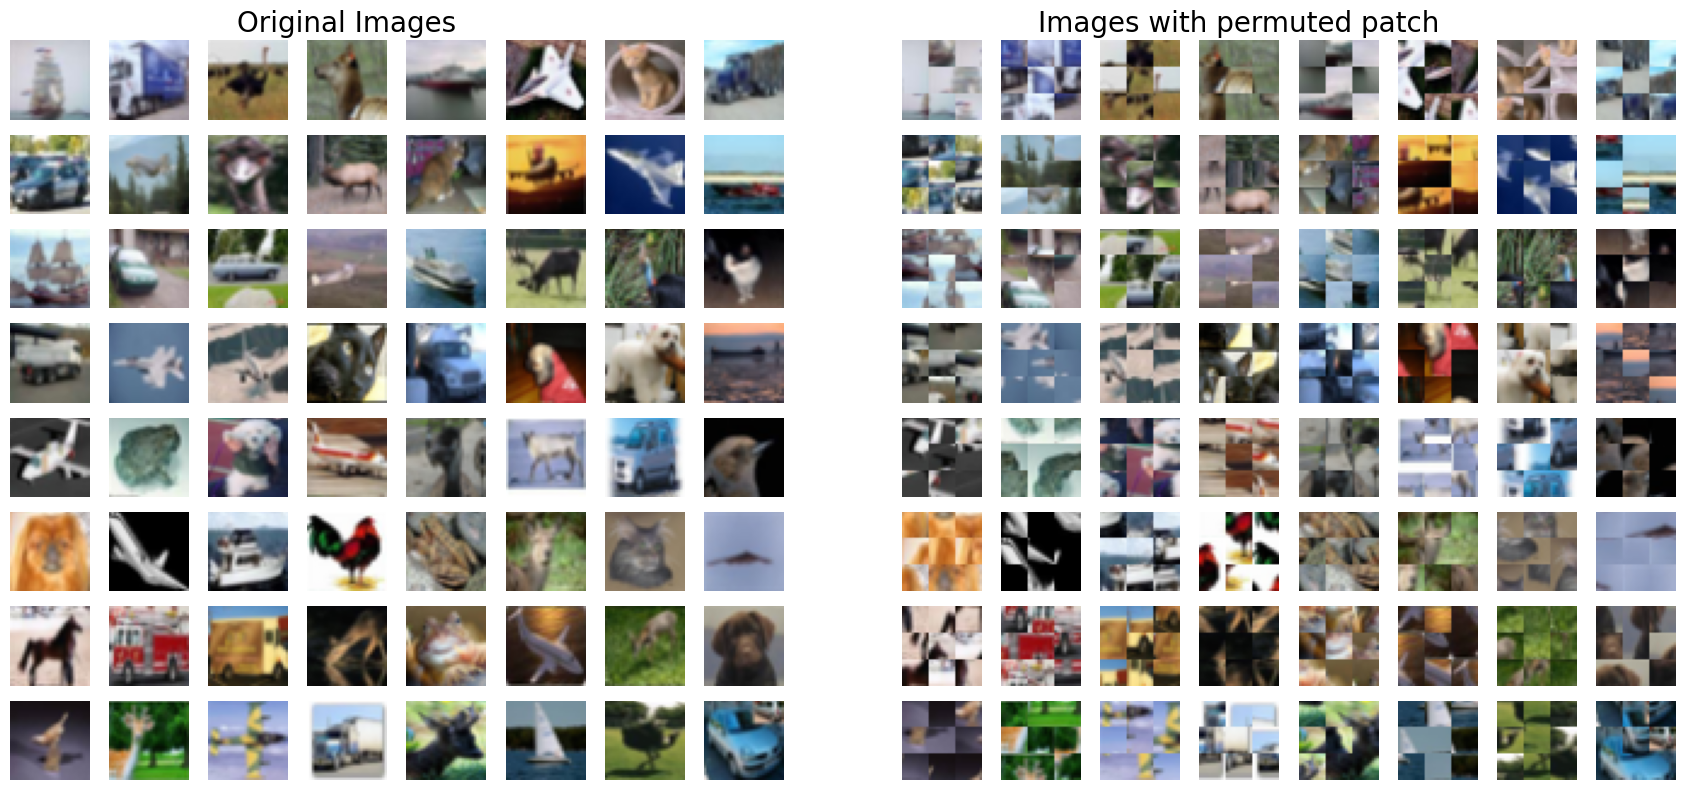

In [16]:
orig_img, permuted_img, patches, perm_idx = next(iter(trainloader))
images_visualization(orig_img, permuted_img)

## Model Building


## Training the model

## Final Results

## Conclusion